# FAKE NEWS IN THE ARTICLE


In [1]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [2]:
pwd

'/Users/vishnusuresh'

In [3]:
df= pd.read_csv('../vishnusuresh/Major project/news.csv')
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
#get the labels from the DataFrame.

In [5]:
# Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [6]:
# Split the dataset into training and testing sett
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [7]:
#tdf vectorization
# Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [8]:
#Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 92.98%


In [9]:
#to print the  confusion matrix

confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[591,  47],
       [ 42, 587]])

# fake news of job posting


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [11]:
fake = pd.read_csv('../vishnusuresh/Major project/fake_job_postings.csv')

In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#Other visualization packages
import seaborn as sns

#Importing NLP plugins
from nltk.corpus import stopwords 
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer 
import string

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Importing our Sklearn Plugins
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

#importing our models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

#Model Evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [13]:
df = pd.read_csv('../vishnusuresh/Major project/fake_job_postings.csv')
df.shape

(17880, 18)

In [14]:
df.head(3)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [16]:
#Check percentage of data missing for each feature/column
df.isna().sum()/len(df)

job_id                 0.000000
title                  0.000000
location               0.019351
department             0.645805
salary_range           0.839597
company_profile        0.185011
description            0.000056
requirements           0.150727
benefits               0.403244
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.194128
required_experience    0.394295
required_education     0.453300
industry               0.274217
function               0.361018
fraudulent             0.000000
dtype: float64

In [17]:
#Checking for unique elements for each column
df.nunique()

job_id                 17880
title                  11231
location                3105
department              1337
salary_range             874
company_profile         1709
description            14801
requirements           11968
benefits                6205
telecommuting              2
has_company_logo           2
has_questions              2
employment_type            5
required_experience        7
required_education        13
industry                 131
function                  37
fraudulent                 2
dtype: int64

In [18]:
df_2 = df.copy()
df_2 = df_2.drop(labels = ['job_id','salary_range',
                    'department','benefits',
                    'company_profile'], axis = 1) #axis = 1 to refer droping columns

In [19]:
df_2['employment_type'] = df_2['employment_type'].bfill(axis=0)
df_2['required_experience'] = df_2['required_experience'].bfill(axis = 0)
df_2['required_education'] = df_2['required_education'].bfill(axis = 0)
df_2['industry'] = df_2['industry'].bfill(axis = 0)
df_2['function'] = df_2['function'].bfill(axis = 0)

In [20]:
# Make Dataframe copy
df_3 = df_2.copy()

# Keeping non NaN rows in my new dataframe
df_3 = df_3[df_3['description'].notna()]

In [21]:
df_3 = df_3.dropna(axis = 0, how = 'any')

In [22]:
df_3 = df_3.drop_duplicates(keep = 'first')

In [23]:
df_3.isna().sum()/len(df)

title                  0.0
location               0.0
description            0.0
requirements           0.0
telecommuting          0.0
has_company_logo       0.0
has_questions          0.0
employment_type        0.0
required_experience    0.0
required_education     0.0
industry               0.0
function               0.0
fraudulent             0.0
dtype: float64

In [24]:
#After dropping duplicates we have 14836 rows left. It seems there were 178 duplicate rows.

In [25]:
# Make copy
df_4 = df_3.copy()

#concatenating our description and requirments columns
df_4['description'] = df_4['description'] + ' ' + df_4['requirements']
del df_4['requirements']

In [26]:
df_clean = df_4.copy()

display(df_clean.head(7))
print(df_clean.shape)

,title,location,description,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","Food52, a fast-growing, James Beard Award-winn...",0,1,0,Other,Internship,Bachelor's Degree,Marketing and Advertising,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,Full-time,Not Applicable,Bachelor's Degree,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever","Our client, located in Houston, is actively se...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
3,Account Executive - Washington DC,"US, DC, Washington",THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
6,Head of Content (m/f),"DE, BE, Berlin",Your Responsibilities: Manage the English-spea...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,Lead Guest Service Specialist,"US, CA, San Francisco",Who is Airenvy?Hey there! We are seasoned entr...,0,1,1,Full-time,Associate,High School or equivalent,Information Technology and Services,Customer Service,0


(14836, 12)


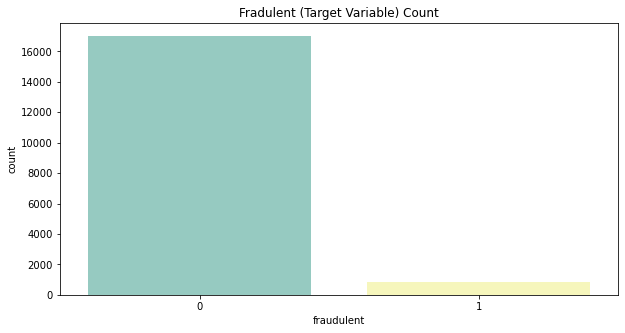

In [27]:
#Ploting the Target variable
plt.figure(figsize = (10,5))
sns.countplot(x = df.fraudulent, data = df,palette="Set3")
plt.title('Fradulent (Target Variable) Count')
plt.show()

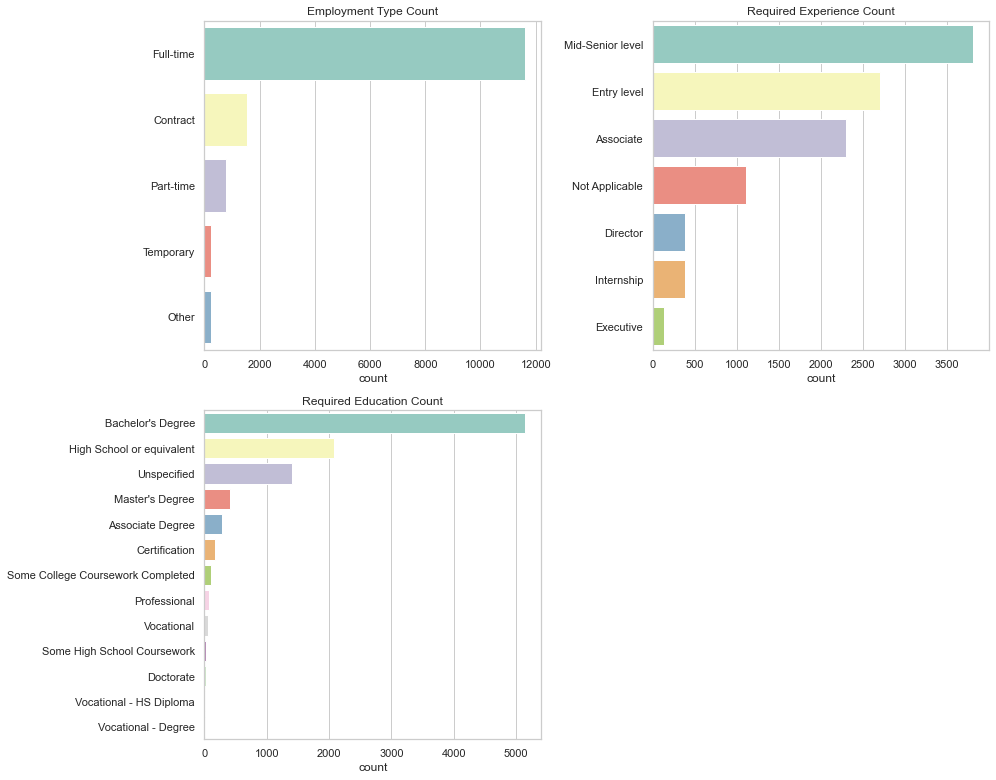

In [28]:
#Stylistic Set
sns.set(style="whitegrid")

plt.figure(figsize = (14,11))

#fig 1
plt.subplot(2,2,1)
sns.countplot(y = df.employment_type, data = df,palette="Set3", 
              order = df.employment_type.value_counts().index)
plt.title("Employment Type Count")
plt.ylabel("")

#fig2
plt.subplot(2,2,2)
#matplotlib version
#df.required_experience.value_counts().plot(kind='barh')
#sns version
sns.countplot(y = df.required_experience, data = df,palette="Set3",
             order = df.required_experience.value_counts().index)
plt.title("Required Experience Count")
plt.ylabel("")

#fig 3
plt.subplot(2,2,3)
sns.countplot(y = df.required_education, data = df,palette="Set3",
             order = df.required_education.value_counts().index)
plt.title("Required Education Count")
plt.ylabel("")

plt.tight_layout()
plt.show()

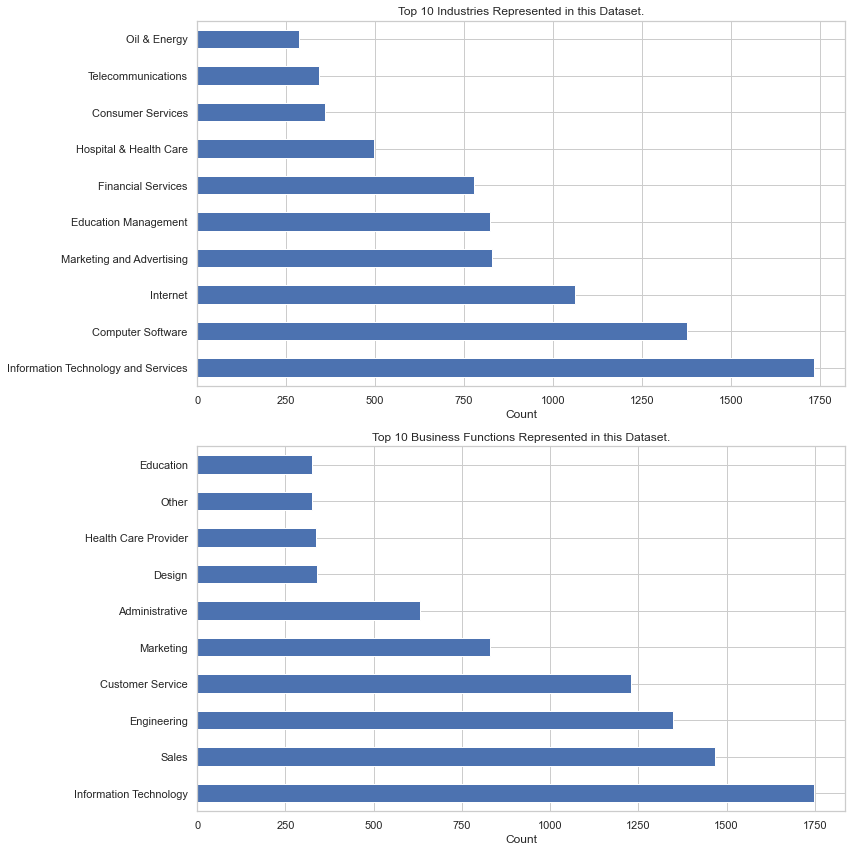

In [29]:
industry = df.industry.value_counts()[:10]
function = df.function.value_counts()[:10]

plt.figure(figsize = (12,12))

plt.subplot(2,1,1)
industry.plot(kind = 'barh')
plt.title('Top 10 Industries Represented in this Dataset.')
plt.xlabel('Count')

plt.subplot(2,1,2)
function.plot(kind = 'barh')
plt.title('Top 10 Business Functions Represented in this Dataset.')
plt.xlabel('Count')

plt.tight_layout()
plt.show()

# feature extraction 

In [30]:
df_5 = df_clean.copy()

# One Hot Encoding using Pandas get dummies function
columns_to_1_hot = ['employment_type','required_experience','required_education',
                   'industry', 'function']

for column in columns_to_1_hot:
    encoded = pd.get_dummies(df_5[column])
    df_5 = pd.concat([df_5, encoded], axis = 1)


In [31]:
columns_to_1_hot += ['title', 'location']
    
#droping the original columns that we just one hot encoded from
df_5 = df_5.drop(columns_to_1_hot, axis = 1)

In [32]:
df_5.head()

,description,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,...,Public Relations,Purchasing,Quality Assurance,Research,Sales,Science,Strategy/Planning,Supply Chain,Training,Writing/Editing
0,"Food52, a fast-growing, James Beard Award-winn...",0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Organised - Focused - Vibrant - Awesome!Do you...,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Our client, located in Houston, is actively se...",0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,THE COMPANY: ESRI – Environmental Systems Rese...,0,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,JOB TITLE: Itemization Review ManagerLOCATION:...,0,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
def tokenizer(text):
    
    #All characters in this string will be converted to lowercase
    text = text.lower()
    
    #Removing sentence punctuations
    for punctuation_mark in string.punctuation:
        text = text.replace(punctuation_mark,'')
    
    #Creating our list of tokens
    list_of_tokens = text.split(' ')
    #Creating our cleaned tokens list 
    cleaned_tokens = []
    #Intatiating our Lemmatizer
    lemmatizer = WordNetLemmatizer()
      #Removing Stop Words in our list of tokens and any tokens that happens to be empty strings
    for token in list_of_tokens:
        if (not token in stop_words) and (token != ''):
            #lemmatizing our token
            token_lemmatized = lemmatizer.lemmatize(token)
            #appending our finalized cleaned token
            cleaned_tokens.append(token_lemmatized)
    
    return cleaned_tokens

In [34]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer


In [35]:
from nltk.corpus import stopwords

In [36]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vishnusuresh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vishnusuresh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer


In [38]:
from nltk.corpus import stopwords

In [39]:
#from nltk.corpus import brown

In [40]:
#brown.words()

In [41]:
df_6 = df_5.copy()

#Instatiating our tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer = tokenizer, min_df = 0.05, ngram_range=(1,3))
print (tfidf)
print (df_6['description'])
#Fit_transform our description 
tfidf_features = tfidf.fit_transform(df_6['description']) #this will create a sparse matrix

TfidfVectorizer(min_df=0.05, ngram_range=(1, 3),
                tokenizer=<function tokenizer at 0x7fb886a8b040>)
0        Food52, a fast-growing, James Beard Award-winn...
1        Organised - Focused - Vibrant - Awesome!Do you...
2        Our client, located in Houston, is actively se...
3        THE COMPANY: ESRI – Environmental Systems Rese...
4        JOB TITLE: Itemization Review ManagerLOCATION:...
                               ...                        
17873    RESPONSIBILITIES:Will facilitate the recruitin...
17875    Just in case this is the first time you’ve vis...
17876    The Payroll Accountant will focus primarily on...
17877    Experienced Project Cost Control Staff Enginee...
17878    Nemsia Studios is looking for an experienced v...
Name: description, Length: 14836, dtype: object


In [42]:
#I want to append this sparse matrix to the original pandas Dataframe
tfidf_vect_df = pd.DataFrame(tfidf_features.todense(), columns = tfidf.get_feature_names())

df_tfidf = pd.concat([df_6, tfidf_vect_df], axis = 1)

#Minor Cleaning steps after appending our tfidf results to our Dataframe, we will need to drop the description column. 
df_tfidf = df_tfidf.drop(['description'], axis = 1)
df_tfidf = df_tfidf.dropna()

In [43]:
df_tfidf.head(3)

,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,Associate,...,write,writing,written,written communication,written verbal,year,year experience,you’ll,,–
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Instatiating our CountVectorizer
count_vect = CountVectorizer(tokenizer = tokenizer, min_df = 0.05, ngram_range=(1,3))
#Fit_transform our description 
count_vect_features = count_vect.fit_transform(df_6['description']) #this will create a sparse matrix

count_vect_df = pd.DataFrame(count_vect_features.todense(), columns = count_vect.get_feature_names())

df_count_vect = pd.concat([df_6, count_vect_df], axis = 1)
df_count_vect = df_count_vect.drop(['description'], axis = 1)
df_count_vect = df_count_vect.dropna()

In [45]:
df_count_vect.head(3)

,telecommuting,has_company_logo,has_questions,fraudulent,Contract,Full-time,Other,Part-time,Temporary,Associate,...,write,writing,written,written communication,written verbal,year,year experience,you’ll,,–
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# logistic regression

In [46]:
target = df_tfidf.fraudulent
features = df_tfidf.drop(['fraudulent'], axis = 1)

#Spliting our Data into train and holdout sets to test our models
X_train, X_hold, y_train, y_hold = train_test_split(features, target, test_size = 0.1,
                                                    stratify = target, random_state = 42)

In [47]:
#Intatiating our Logistic Regression Model
log_reg = LogisticRegression()
#I want to optimze the C-Value and penalty
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]
penalty_options = ['l1','l2']

param_grid = dict(C = c_values, penalty = penalty_options)

In [48]:
grid_tfidf = GridSearchCV(log_reg, param_grid= param_grid, cv = 10, scoring = 'roc_auc', n_jobs = -1)

In [49]:
grid_tfidf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [50]:
print(grid_tfidf.best_score_)
print(grid_tfidf.best_params_)

0.8520861054296776
{'C': 1, 'penalty': 'l2'}


In [51]:
log_reg_tfidf_pred = grid_tfidf.predict(X_hold)
print(roc_auc_score(y_hold, log_reg_tfidf_pred))
print(classification_report(y_hold, log_reg_tfidf_pred))

0.5801411682352026
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1196
         1.0       0.70      0.16      0.26        43

    accuracy                           0.97      1239
   macro avg       0.84      0.58      0.62      1239
weighted avg       0.96      0.97      0.96      1239



# KNN CLASSIFIER


In [52]:
# Model - KNearestNeighbors
knn = KNeighborsClassifier()

#The parameters we would like to optimize for
k_range = list(np.arange(2,23,2))
param_grid_knn = dict(n_neighbors=k_range)
print(param_grid_knn)

{'n_neighbors': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22]}


In [53]:
#Intatiate our knn gridsearch
grid_knn = GridSearchCV(knn, param_grid_knn, cv=10, scoring='roc_auc',
                        n_jobs = -1)

#Fit our grid_knn
grid_knn.fit(X_train, y_train)
print(grid_knn.best_score_)
print(grid_knn.best_params_)

0.857757918485041
{'n_neighbors': 20}


In [54]:
#predicting on our holdout data
knn_pred = grid_knn.predict(X_hold)
#Printing out our evaluation metrics
print(roc_auc_score(y_hold, knn_pred))
print(classification_report(y_hold, knn_pred))

0.5809772886365404
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1196
         1.0       0.88      0.16      0.27        43

    accuracy                           0.97      1239
   macro avg       0.92      0.58      0.63      1239
weighted avg       0.97      0.97      0.96      1239

